## Content
#### Top 10 Movies according to their Ratings and number of votes higher than 1000.
#### IMDB rating method using Average weighted rating formula.
#### Top 10 Movies according to their Average weighted Ratings.
#### Top 10 Movies according to their Popularity.
#### Top 10 Movies according to Equal weightage to rating and popularity.
###   Last: Top 10 Movies according to the content and arranged according to the highest equal weightage of popularity and ratings.

# Importing Libraries and Dataset

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
movies=pd.read_csv('Top Rated Movie Database.csv')

# DataSet Inspection

In [32]:
movies.head()

,Popularity,Vote Count,Titile,Vote Average,Overview,Release Date
0,453.361,2875,Ad Astra,5.9,"The near future, a time when both hope and har...",2019-09-17
1,315.622,2653,Bad Boys for Life,7.1,Marcus and Mike are forced to confront new thr...,2020-01-15
2,241.513,1419,Bloodshot,7.2,"After he and his wife are murdered, marine Ray...",2020-03-05
3,209.518,2717,Birds of Prey (and the Fantabulous Emancipatio...,7.1,"Harley Quinn joins forces with a singer, an as...",2020-02-05
4,188.203,3834,Star Wars: The Rise of Skywalker,6.5,The surviving Resistance faces the First Order...,2019-12-18


Renaming the columns name because they contains whitespace in between which cause an error to programe.

In [33]:
movies.rename(columns={'Vote Average':'Ratings','Titile':'Title','Vote Count':'Votes','Release Date':'Release_Date'},inplace=True)

In [34]:
movies.columns

Index(['Popularity', 'Votes', 'Title', 'Ratings', 'Overview', 'Release_Date'], dtype='object')

In [35]:
movies.describe()

,Popularity,Votes,Ratings
count,10000.000000,10000.000000,10000.000000
mean,13.439259,1015.165500,6.341660
std,10.970790,1996.812101,1.264592
min,5.258000,0.000000,0.000000
25%,9.194750,136.000000,5.800000
50%,11.158500,312.000000,6.500000
75%,14.276500,919.000000,7.100000
max,453.361000,25168.000000,10.000000


In [36]:
movies.isna().sum()

Popularity       0
Votes            0
Title            0
Ratings          0
Overview        25
Release_Date    19
dtype: int64

__As we can see there are many movies with same name but they are just sharing names and the content of the movies are completly different. So, I added thier release date year with the name so that we can differentiate them.__

In [37]:
movies.Title.value_counts()

Beauty and the Beast    4
The Mummy               4
Dracula                 4
Godzilla                3
Point Blank             3
                       ..
Death on the Nile       1
Hurricane Bianca        1
Glass                   1
Filth                   1
Nativity!               1
Name: Title, Length: 9674, dtype: int64

In [38]:
movies[movies['Title']=='The Mummy']

,Popularity,Votes,Title,Ratings,Overview,Release_Date
768,23.760,5674,The Mummy,6.8,Dashing legionnaire Rick O'Connell stumbles up...,1999-04-16
1426,15.581,5005,The Mummy,5.5,Though safely entombed in a crypt deep beneath...,2017-06-06
4291,9.575,263,The Mummy,6.9,An ancient Egyptian priest named Imhotep is re...,1932-12-22
9137,8.381,102,The Mummy,6.9,One by one the archaeologists who discover the...,1959-09-29


In [39]:
movies[movies['Title']=='Dracula']

,Popularity,Votes,Title,Ratings,Overview,Release_Date
970,20.029,2777,Dracula,7.4,When Dracula leaves the captive Jonathan Harke...,1992-11-13
3862,12.636,257,Dracula,7.3,After Jonathan Harker attacks Dracula at his c...,1958-05-22
4080,9.454,95,Dracula,6.5,Romanticized adaptation of Bram Stoker's 1897 ...,1979-07-20
9636,9.839,565,Dracula,7.2,The one that started them all. A powerful and ...,1931-02-12


In [40]:
# Extracting the year from the Release date column.
m=movies['Release_Date'].map(lambda x :str(x).split('-')[0])

In [41]:
#creating a copy for doing all the necessary changes.  
movies_new=movies.copy(deep=True)

In [42]:
movies_new['Title']=movies['Title'] + ' [' + m + ']'

In [43]:
movies_new.head()

,Popularity,Votes,Title,Ratings,Overview,Release_Date
0,453.361,2875,Ad Astra [2019],5.9,"The near future, a time when both hope and har...",2019-09-17
1,315.622,2653,Bad Boys for Life [2020],7.1,Marcus and Mike are forced to confront new thr...,2020-01-15
2,241.513,1419,Bloodshot [2020],7.2,"After he and his wife are murdered, marine Ray...",2020-03-05
3,209.518,2717,Birds of Prey (and the Fantabulous Emancipatio...,7.1,"Harley Quinn joins forces with a singer, an as...",2020-02-05
4,188.203,3834,Star Wars: The Rise of Skywalker [2019],6.5,The surviving Resistance faces the First Order...,2019-12-18


In [46]:
# create a copy data with same number of features
movies_new.shape,movies.shape

((10000, 6), (10000, 6))

__Taking care of Overview and Release data missing values.__

In [47]:
movies_new['Overview'].fillna(value='',inplace=True)

In [49]:
# movies name which are not going to recommended due to missing values
movies_new[movies_new['Overview']=='']

,Popularity,Votes,Title,Ratings,Overview,Release_Date
101,47.402,21,Recep İvedik 6 [2019],4.4,,2019-11-07
262,32.689,1,Corona Zombies [2020],1.0,,2020-04-10
310,25.899,0,Arjona Circo Soledad en Vivo [2019],0.0,,2019-08-30
470,22.654,26,Ustica: The Missing Paper [2016],5.6,,2016-03-31
524,23.212,0,La noche mágica [2020],0.0,,2020-04-09
550,14.590,0,Autonomes [2020],0.0,,2020-04-08
553,14.556,0,Tout nous sourit [2020],0.0,,2020-04-08
561,15.546,2,Vivre sans eux [2020],6.0,,2020-04-08
850,21.749,0,No Gogó do Paulinho [2020],0.0,,2020-04-09
864,21.706,20,X-Men: Production Scrapbook [2000],6.3,,2000-11-02


In [50]:
movies_new['Release_Date'].fillna(movies['Release_Date'].mode()[0],inplace=True)

__Movies with highest rating and having number of votes higher then the average votes given to all movies.__

In [53]:
rate=movies_new.sort_values('Ratings',ascending=False)
rate=rate[rate['Votes'] > rate['Votes'].mean()]     # mean is close to 1000
rate.head(10)

,Popularity,Votes,Title,Ratings,Overview,Release_Date
656,23.546,2231,Dilwale Dulhania Le Jayenge [1995],8.8,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20
154,43.202,11795,The Godfather [1972],8.7,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14
64,54.549,15551,The Shawshank Redemption [1994],8.7,Framed in the 1940s for the double murder of h...,1994-09-23
351,31.658,9385,Schindler's List [1993],8.6,The true story of how businessman Oskar Schind...,1993-11-30
149,41.760,9029,Spirited Away [2001],8.5,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20
152,38.827,18034,Pulp Fiction [1994],8.5,"A burger-loving hit man, his philosophical par...",1994-09-10
312,41.830,5237,Your Name. [2016],8.5,High schoolers Mitsuha and Taki are complete s...,2016-08-26
313,27.063,9757,The Green Mile [1999],8.5,A supernatural tale set on death row in a Sout...,1999-12-10
372,27.104,6931,The Godfather: Part II [1974],8.5,In the continuing saga of the Corleone crime f...,1974-12-20
493,26.063,8497,Life Is Beautiful [1997],8.5,A touching story of an Italian book seller of ...,1997-12-20


# Top 10 Movies according to their Ratings and number of votes higher than 1000.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


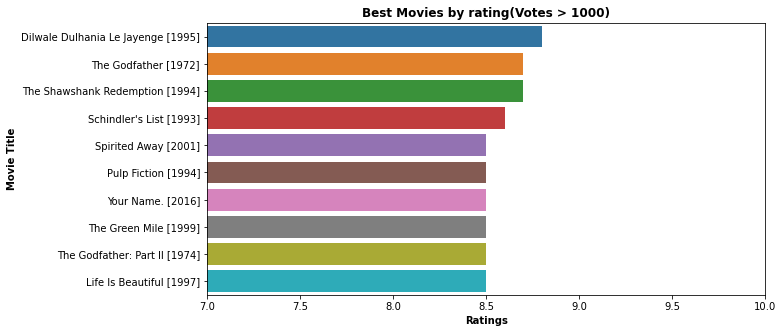

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(rate['Ratings'].head(10),rate['Title'].head(10));
plt.xlim(7, 10)
plt.title('Best Movies by rating(Votes > 1000)', weight='bold')
plt.xlabel('Ratings', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('Ratings.png')

## __IMDB rating method using Average weighted rating formula.__  
__Calculating the Average_weighted_ratings for each movie.__

In [55]:
R=movies_new['Ratings']          #Average rating of each movie.
v=movies_new['Votes']             # Number of times rating given to movie.
avgR=movies_new['Ratings'].mean()  # Average rating of all the movies.
minq=movies_new['Votes'].quantile(.75)   # Minimum number of votes required to be in top 25%.


In [56]:
avgR,minq

(6.3416599999999805, 919.0)

In [57]:
movies_new['Average_weighted_ratings']=((R*v)+(avgR*minq))/(v+minq)

__Arranging them in order of high to low rating.__

In [58]:
ratings=movies_new.sort_values('Average_weighted_ratings',ascending=False)

In [59]:
ratings.head(10)

,Popularity,Votes,Title,Ratings,Overview,Release_Date,Average_weighted_ratings
64,54.549,15551,The Shawshank Redemption [1994],8.7,Framed in the 1940s for the double murder of h...,1994-09-23,8.568408
154,43.202,11795,The Godfather [1972],8.7,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.529533
351,31.658,9385,Schindler's List [1993],8.6,The true story of how businessman Oskar Schind...,1993-11-30,8.398582
152,38.827,18034,Pulp Fiction [1994],8.5,"A burger-loving hit man, his philosophical par...",1994-09-10,8.395346
82,44.252,21588,The Dark Knight [2008],8.4,Batman raises the stakes in his war on crime. ...,2008-07-16,8.315954
313,27.063,9757,The Green Mile [1999],8.5,A supernatural tale set on death row in a Sout...,1999-12-10,8.314208
185,34.662,18691,Fight Club [1999],8.4,A ticking-time-bomb insomniac and a slippery s...,1999-10-15,8.303538
149,41.760,9029,Spirited Away [2001],8.5,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20,8.300612
177,34.235,17372,Forrest Gump [1994],8.4,A man with a low IQ has accomplished great thi...,1994-07-06,8.296582
493,26.063,8497,Life Is Beautiful [1997],8.5,A touching story of an Italian book seller of ...,1997-12-20,8.289346


# Top 10 Movies according to their Average weighted Ratings.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


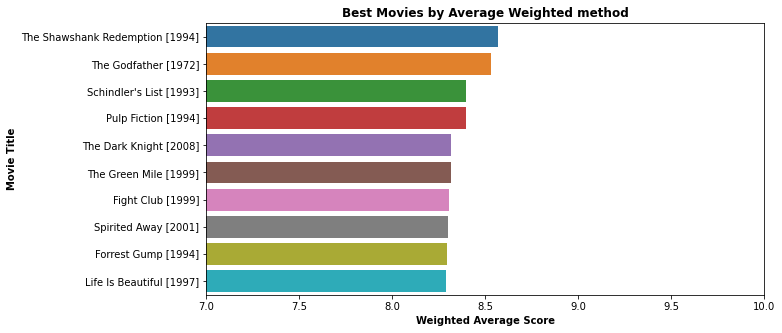

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(ratings['Average_weighted_ratings'].head(10),ratings['Title'].head(10));
plt.xlim(7, 10)
plt.title('Best Movies by Average Weighted method', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('Average weighted Ratings.png')

__Arranging them in order of high to low Popularity.__

In [61]:
popularity= movies_new.sort_values('Popularity',ascending=False)

In [63]:
popularity.head(10)

,Popularity,Votes,Title,Ratings,Overview,Release_Date,Average_weighted_ratings
0,453.361,2875,Ad Astra [2019],5.9,"The near future, a time when both hope and har...",2019-09-17,6.006981
1,315.622,2653,Bad Boys for Life [2020],7.1,Marcus and Mike are forced to confront new thr...,2020-01-15,6.904895
2,241.513,1419,Bloodshot [2020],7.2,"After he and his wife are murdered, marine Ray...",2020-03-05,6.862611
3,209.518,2717,Birds of Prey (and the Fantabulous Emancipatio...,7.1,"Harley Quinn joins forces with a singer, an as...",2020-02-05,6.908329
5,192.374,2130,Sonic the Hedgehog [2020],7.4,Based on the global blockbuster videogame fran...,2020-02-12,7.081005
4,188.203,3834,Star Wars: The Rise of Skywalker [2019],6.5,The surviving Resistance faces the First Order...,2019-12-18,6.469385
6,167.159,303,Teen Titans: The Judas Contract [2017],7.2,Tara Markov is a girl who has power over earth...,2017-03-22,6.554489
15,151.710,755,The Gentlemen [2019],7.8,American expat Mickey Pearson has built a high...,2019-12-16,6.999394
13,150.556,53,Trolls World Tour [2020],8.0,Queen Poppy and Branch make a surprising disco...,2020-03-12,6.432084
7,146.954,2028,The Platform [2019],7.1,"A mysterious place, an indescribable prison, a...",2019-11-08,6.863517


# Top 10 Movies according to their Popularity.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


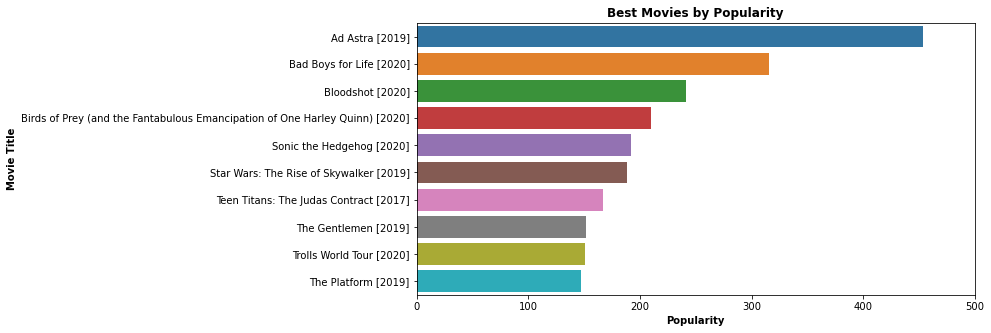

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(popularity['Popularity'].head(10),popularity['Title'].head(10));
plt.xlim(0, 500)
plt.title('Best Movies by Popularity', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('Popularity.png')

__Giving 50-50 % Importance to both 'Average_weighted_ratings' and 'Popularity' .__

In [66]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
normalized=pd.DataFrame(mms.fit_transform(movies_new.loc[:,['Popularity','Average_weighted_ratings']]))
normalized.head()

,0,1
0,1.000000,0.405654
1,0.692618,0.614004
2,0.527234,0.604192
3,0.455833,0.614800
4,0.408266,0.512949


In [67]:
movies_new['Equal_importance']=normalized[0]*0.5 + normalized[1]*0.5

__Arranging them in order of high to low thier popularity and ratings.__

In [68]:
Equal_importance=movies_new.sort_values('Equal_importance',ascending=False)

In [69]:
Equal_importance.head(10)

,Popularity,Votes,Title,Ratings,Overview,Release_Date,Average_weighted_ratings,Equal_importance
0,453.361,2875,Ad Astra [2019],5.9,"The near future, a time when both hope and har...",2019-09-17,6.006981,0.702827
1,315.622,2653,Bad Boys for Life [2020],7.1,Marcus and Mike are forced to confront new thr...,2020-01-15,6.904895,0.653311
2,241.513,1419,Bloodshot [2020],7.2,"After he and his wife are murdered, marine Ray...",2020-03-05,6.862611,0.565713
20,100.558,6106,Parasite [2019],8.5,"All unemployed, Ki-taek's family takes peculia...",2019-05-30,8.217649,0.565643
64,54.549,15551,The Shawshank Redemption [1994],8.7,Framed in the 1940s for the double murder of h...,1994-09-23,8.568408,0.555000
44,83.528,17457,Avengers: Infinity War [2018],8.3,As the Avengers and their allies have continue...,2018-04-25,8.202062,0.544832
24,95.498,10980,Joker [2019],8.2,"During the 1980s, a failed stand-up comedian i...",2019-10-02,8.056474,0.541297
39,78.162,21624,Interstellar [2014],8.3,Interstellar chronicles the adventures of a gr...,2014-11-05,8.220165,0.540945
154,43.202,11795,The Godfather [1972],8.7,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.529533,0.537828
5,192.374,2130,Sonic the Hedgehog [2020],7.4,Based on the global blockbuster videogame fran...,2020-02-12,7.081005,0.536221


# Top 10 Movies according to Equal weightage to rating and popularity.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


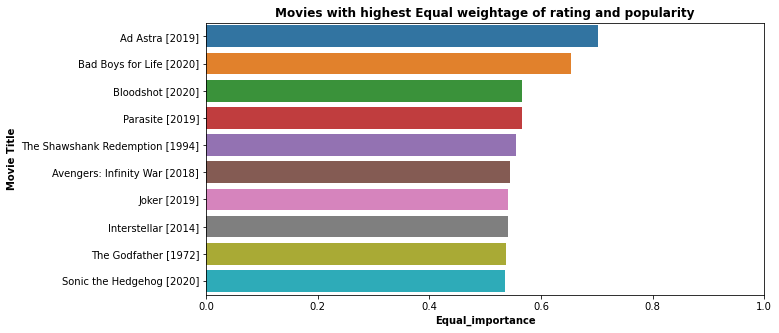

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(Equal_importance['Equal_importance'].head(10),Equal_importance['Title'].head(10));
plt.xlim(0, 1)
plt.title('Movies with highest Equal weightage of rating and popularity', weight='bold')
plt.xlabel('Equal_importance', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('Best Movies with Popularity and Rating.png')

# Content based recommendation

In [98]:
movies_new.head()

,Popularity,Votes,Title,Ratings,Overview,Release_Date,Average_weighted_ratings,Equal_importance
0,453.361,2875,Ad Astra [2019],5.9,"The near future, a time when both hope and har...",2019-09-17,6.006981,0.702827
1,315.622,2653,Bad Boys for Life [2020],7.1,Marcus and Mike are forced to confront new thr...,2020-01-15,6.904895,0.653311
2,241.513,1419,Bloodshot [2020],7.2,"After he and his wife are murdered, marine Ray...",2020-03-05,6.862611,0.565713
3,209.518,2717,Birds of Prey (and the Fantabulous Emancipatio...,7.1,"Harley Quinn joins forces with a singer, an as...",2020-02-05,6.908329,0.535317
4,188.203,3834,Star Wars: The Rise of Skywalker [2019],6.5,The surviving Resistance faces the First Order...,2019-12-18,6.469385,0.460607


In [72]:
# Using Overview feature for content extraction and recommendation
movies_new.isna().sum()

Popularity                  0
Votes                       0
Title                       0
Ratings                     0
Overview                    0
Release_Date                0
Average_weighted_ratings    0
Equal_importance            0
dtype: int64

In [73]:
# creating a sparse matrix of overview column and using it for checking similarity between different movies.
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
# movies['overview'] = movies['overview'].fillna('')

In [74]:
tfv_matrix=tfv.fit_transform(movies_new['Overview'])

In [75]:
tfv_matrix

<10000x18272 sparse matrix of type '<class 'numpy.float64'>'
	with 266865 stored elements in Compressed Sparse Row format>

In [76]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [77]:
sig=sigmoid_kernel(tfv_matrix,tfv_matrix)

In [78]:
sig.shape

(10000, 10000)

In [79]:
sig[0]

array([0.76161714, 0.76159416, 0.76159428, ..., 0.76159416, 0.76159459,
       0.76159416])

In [87]:
# giving index to each column of list
list(enumerate(sig))

[(0,
  array([0.76161714, 0.76159416, 0.76159428, ..., 0.76159416, 0.76159459,
         0.76159416])),
 (1,
  array([0.76159416, 0.76161714, 0.76159445, ..., 0.76159416, 0.76159416,
         0.76159502])),
 (2,
  array([0.76159428, 0.76159445, 0.76161714, ..., 0.76159416, 0.76159416,
         0.76159416])),
 (3,
  array([0.76159416, 0.76159456, 0.76159416, ..., 0.76159416, 0.76159416,
         0.76159416])),
 (4,
  array([0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
         0.76159416])),
 (5,
  array([0.761595  , 0.76159485, 0.76159452, ..., 0.76159493, 0.76159416,
         0.76159416])),
 (6,
  array([0.76159467, 0.76159416, 0.76159424, ..., 0.76159416, 0.76159416,
         0.76159416])),
 (7,
  array([0.76159513, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159472,
         0.76159416])),
 (8,
  array([0.7615952 , 0.76159416, 0.76159416, ..., 0.76159528, 0.76159416,
         0.7615948 ])),
 (9,
  array([0.76159416, 0.76159506, 0.76159429, ..., 0.76159416, 0.7615

In [80]:
indices=pd.Series(movies_new.index ,index=movies_new['Title']).drop_duplicates()

In [81]:
indices

Title
Ad Astra [2019]                                                                   0
Bad Boys for Life [2020]                                                          1
Bloodshot [2020]                                                                  2
Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn) [2020]       3
Star Wars: The Rise of Skywalker [2019]                                           4
                                                                               ... 
Lebanon [2009]                                                                 9995
Pokémon Heroes: Latios and Latias [2002]                                       9996
The Captain [2019]                                                             9997
Feast of Love [2007]                                                           9998
Our Souls at Night [2017]                                                      9999
Length: 10000, dtype: int64

In [84]:
indices['The Captain [2019]']

9997

In [95]:
def give_rec(title, sig=sig):
    # Get the index of movie corresponding to original_title with release date year.
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_new.iloc[movie_indices]

In [130]:
# Testing our content-based recommendation system with the 'Interstellar [2014]' movie
# result=give_rec('Interstellar [2014]').sort_values(ascending=False,by='Equal_importance')

In [131]:
# basis of equal weightage to popularity and Ratings
give_rec('Interstellar [2014]').sort_values(ascending=False,by='Equal_importance').loc[:,['Title','Equal_importance']]

,Title,Equal_importance
308,Gattaca [1997],0.379843
88,Star Wars: The Last Jedi [2017],0.361216
1299,Starship Troopers [1997],0.303318
1174,Stargate [1994],0.297650
3889,Space Pirate Captain Harlock [2013],0.253314
5938,Space Cowboys [2000],0.249887
9867,Voices of a Distant Star [2002],0.247713
5146,All Good Things [2010],0.233102
2072,Stuart Little [1999],0.223988
4932,400 Days [2015],0.185072


In [134]:
# basis of Average_weighted_ratings
give_rec('Interstellar [2014]').sort_values(ascending=False,by='Average_weighted_ratings').loc[:,['Title','Average_weighted_ratings']]

,Title,Average_weighted_ratings
308,Gattaca [1997],7.274801
88,Star Wars: The Last Jedi [2017],6.945494
1299,Starship Troopers [1997],6.761880
1174,Stargate [1994],6.717851
3889,Space Pirate Captain Harlock [2013],6.407727
9867,Voices of a Distant Star [2002],6.376446
5938,Space Cowboys [2000],6.368369
5146,All Good Things [2010],6.212872
2072,Stuart Little [1999],6.086736
4932,400 Days [2015],5.803434


In [135]:
# basis of popularity
give_rec('Interstellar [2014]').sort_values(ascending=False,by='Popularity').loc[:,['Title','Popularity']]

,Title,Popularity
88,Star Wars: The Last Jedi [2017],49.624
308,Gattaca [1997],32.077
1299,Starship Troopers [1997],16.827
1174,Stargate [1994],16.325
2072,Stuart Little [1999],15.930
5146,All Good Things [2010],10.983
4932,400 Days [2015],10.510
5938,Space Cowboys [2000],9.857
3889,Space Pirate Captain Harlock [2013],8.836
9867,Voices of a Distant Star [2002],7.069


In [122]:
name=input('Enter the movie name with format:"movie_name [year]"')

Enter the movie name with format:"movie_name [year]"Bloodshot [2020]


In [123]:
result_movies=give_rec(name).sort_values(ascending=False,by='Equal_importance')

In [125]:
result_movies.loc[:,['Title','Equal_importance']]

,Title,Equal_importance
439,Dial M for Murder [1954],0.381931
2559,JFK [1991],0.338022
994,Fractured [2019],0.275172
9320,Death Wish [1974],0.267078
4888,Lost in La Mancha [2002],0.258825
6858,Uptown Girls [2003],0.247099
8570,Blind [2017],0.241005
1054,Acts of Vengeance [2017],0.240176
6145,The Alibi [2006],0.239404
9460,Shopgirl [2005],0.236245
